# 2 Gaussians Test

Test of Hamiltonian Nested Sampling on a mixture of two Gaussians

In [6]:
# Imports
import numpy as np
import torch
from gradNS import Param, HamiltonianNS
from getdist import plots, MCSamples

In [2]:
# Number of dimensions of the problem
ndims = 5

# Define the two components
mvn1 = torch.distributions.MultivariateNormal(loc=-2*torch.ones(ndims),
                                             covariance_matrix=torch.diag(
                                                 0.2*torch.ones(ndims)))

mvn2 = torch.distributions.MultivariateNormal(loc=2*torch.ones(ndims),
                                             covariance_matrix=torch.diag(
                                                 0.2*torch.ones(ndims)))

# Define the likelihood
def get_loglike(theta):
    return torch.logsumexp(torch.stack([mvn1.log_prob(theta), mvn2.log_prob(theta)]), dim=0, keepdim=False)

In [ ]:

params = []

for i in range(ndims):
    params.append(
        Param(
            name=f'p{i}',
            prior_type='Uniform',
            prior=(-5, 5),
            label=f'p_{i}')
    )

ns = HamiltonianNS(
    nlive=25*len(params),
    loglike=get_loglike,
    params=params,
    verbose=True,
    clustering=True,
    tol=1e-1
)

In [3]:
ns.run()

---------------------------------------------
logZ = -48.0285, eps = 5.8165e+06
---------------------------------------------
Cluster 0 has volume fraction 1.0000 and logZp = -47.9779
---------------------------------------------
logZ = -30.4824, eps = 1.1817e+04
---------------------------------------------
Cluster 0 has volume fraction 0.5760 and logZp = -30.9914
Cluster 1 has volume fraction 0.4240 and logZp = -31.2978
---------------------------------------------
logZ = -21.0149, eps = 1.1957e+03
---------------------------------------------
Cluster 0 has volume fraction 0.5391 and logZp = -21.7475
Cluster 1 has volume fraction 0.4609 and logZp = -21.5929
---------------------------------------------
logZ = -15.4172, eps = 7.7458e+01
---------------------------------------------
Cluster 0 has volume fraction 0.5433 and logZp = -16.1562
Cluster 1 has volume fraction 0.4567 and logZp = -15.9975
---------------------------------------------
logZ = -12.6223, eps = 1.3689e+01
----------

In [4]:
# The true logZ is the inverse of the prior volume
print('True logZ = ', np.log(1 / 10**len(params)))
print('Number of evaluations', ns.get_like_evals())

True logZ =  -11.512925464970229
Number of evaluations 654209


Removed no burn in
Removed no burn in


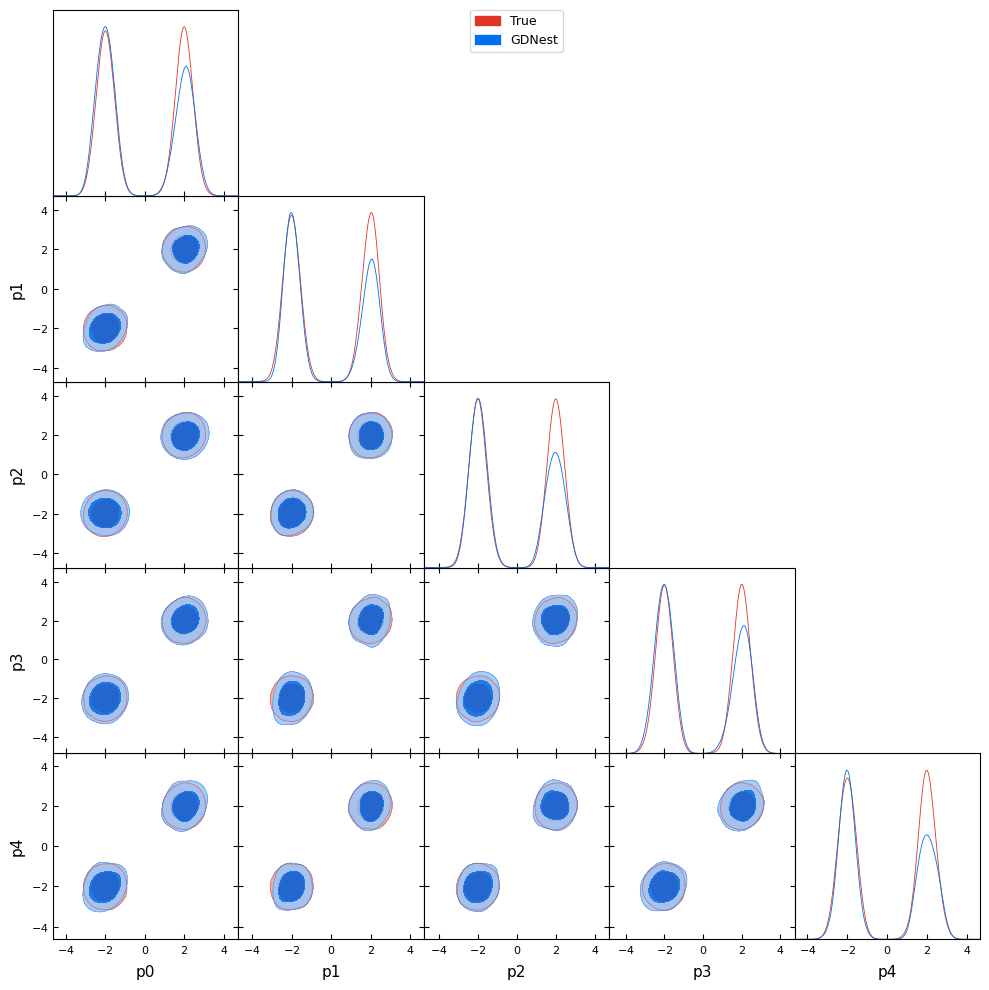

In [5]:
samples = ns.convert_to_getdist()
true_samples = torch.cat([mvn1.sample((5000,)), mvn2.sample((5000,))], dim=0)
true_samples = MCSamples(samples=true_samples.numpy(), names=[f'p{i}' for i in range(ndims)])
g = plots.get_subplot_plotter()
g.triangle_plot([true_samples, samples], [f'p{i}' for i in range(5)], filled=True, legend_labels=['True', 'GDNest'])